# Visualizing Real World Data

## Using Titanic data

In [2]:
#Importing Modules/Libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
#Reading csv file

titanic = pd.read_csv('Data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Name of columns

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Shows how many NaN are present in the data

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Creating a data frame without NaN values, in order to devide by age into quartiles in order to then fill NaN based on frequency of quartile.

In [6]:
titanic_age_no_nan = titanic[titanic['Age'].isna() == False]['Age'] #Series without NaN

quart_age = pd.qcut(titanic_age_no_nan, 4) #Series cut into quartiles

quart_age_top_bin_value = [titanic_age_no_nan.quantile(q = p) for p in [0.25, 0.5, 0.75, 1]] #Max value of each bin

# quart_age_mean = list(stats.binned_statistic(titanic_age_no_nan, titanic_age_no_nan, bins = 4)[0]) 

# quart_age_mean = [round(x) for x in quart_age_mean]


quart_age_mean = [
    round(x) 
    for x 
    in list(stats.binned_statistic(titanic_age_no_nan, titanic_age_no_nan, bins = 4)[0]) #Mean of each bin
]

## Histogram of passenger's ages (without NaN)

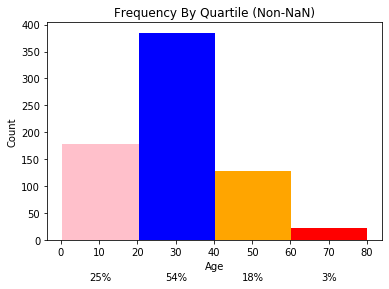

In [6]:
fig, ax = plt.subplots()

counts, bins, patches = ax.hist(titanic_age_no_nan, 4)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency By Quartile (Non-NaN)')

for i in range(0,1):
    patches[i].set_facecolor('pink')
for i in range(1,2):    
    patches[i].set_facecolor('blue')
for i in range(2, 3):
    patches[i].set_facecolor('orange')
for i in range(3, len(patches)):
    patches[i].set_facecolor('red')
    
# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
#     # Label the raw counts
#     ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

    
plt.show()
    

In [7]:
#Confirming percentages per bin

percent_per_bin = list(round((titanic_age_no_nan.value_counts(bins = 4)/titanic_age_no_nan.count()).sort_index(),2))

percent_per_bin #perecentage of vlues per bin

[0.25, 0.54, 0.18, 0.03]

In [8]:
#List of amount of Nan to be replaced with each bin mean
nan_indexes_age = list(titanic[titanic['Age'].isna() == True].index)

len_index_list = [round(x*len(nan_indexes_age)) for x in percent_per_bin]
    
len_index_list
# quart_age_mean
# nan_indexes_age


[44, 96, 32, 5]

In [9]:
quart_age_mean

[13.0, 29.0, 48.0, 66.0]

In [10]:
for i in range(len(len_index_list)):
    titanic['Age'].fillna(value=quart_age_mean[i], inplace=True, limit=len_index_list[i])
    
titanic.isna().sum()
# range(len(len_index_list))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

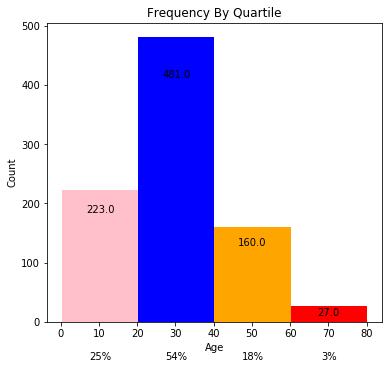

In [11]:
fig, ax = plt.subplots()

fig.set_figheight(5.5)

counts, bins, patches = ax.hist(titanic['Age'], 4)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency By Quartile')

for i in range(0,1):
    patches[i].set_facecolor('pink')
for i in range(1,2):    
    patches[i].set_facecolor('blue')
for i in range(2, 3):
    patches[i].set_facecolor('orange')
for i in range(3, len(patches)):
    patches[i].set_facecolor('red')
    
# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, count*0.525), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -30), textcoords='offset points', va='top', ha='center')

    
plt.show()

## From the graph above, we can see that most passengers were in between the age of 20 to 40 years old, and very few of passengers were on the older side of the spectrum. 

## The insight that I can see from this, is that most people were able bodies but it does not mean that most survivors were those in that age. Now let's contrast that with the amount that survived on the same graph.

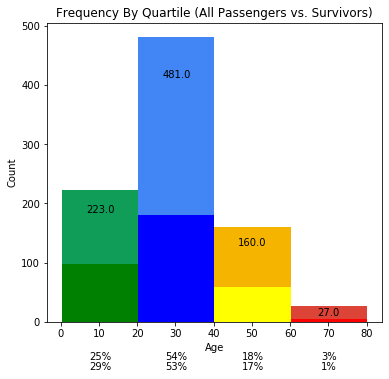

In [12]:
fig, ax = plt.subplots()

fig.set_figheight(5.5)

counts, bins, patches = ax.hist(titanic['Age'], 4)
counts1, bins1, patches1 = ax.hist(titanic[titanic['Survived'] == 1]['Age'], 4)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency By Quartile (All Passengers vs. Survivors)')

for i in range(0, 1):
    patches[i].set_facecolor('#0F9D58')
for i in range(1, 2):    
    patches[i].set_facecolor('#4285F4')
for i in range(2, 3):
    patches[i].set_facecolor('#F4B400')
for i in range(3, len(patches)):
    patches[i].set_facecolor('#DB4437')
    
for i in range(0, 1):
    patches1[i].set_facecolor('green')
for i in range(1, 2):    
    patches1[i].set_facecolor('blue')
for i in range(2, 3):
    patches1[i].set_facecolor('yellow')
for i in range(3, len(patches1)):
    patches1[i].set_facecolor('red')
    
    
# Label the raw counts and the percentages below the x-axis (For all passengers)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, count*0.525), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -30), textcoords='offset points', va='top', ha='center')
    
# Label the raw counts and the percentages below the x-axis (For all survivors)  
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts1, bin_centers):

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts1.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center')

    
plt.show()

## From the graph above, one can see that the distribution % did not remain the same. Out of the survivors, there was a dicrease in distribution % for most but mostly for those between the age of 60 to 80 and an increase in distribution % for those between the age of 0 to 20.

## I would interpret this as passengers were prioritizing saving kids and young adults as they are the future. Although since elderly passengers make up less of in % of the survivors (which means the group had the least amount of surivors as a percentage of its on group), one can tell that the majority of the casualties were of those between the age of 20 to 30.

# Now for something ~~completely~~ different...

## I will now find the relationship between fare and survival

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
age_by_pc_sex_sur = round(pd.pivot_table(titanic, values = 'Age', index = ['Pclass','Sex', 'Survived'], aggfunc = ['mean', 'sum']))
age_by_pc_sex_sur

mean     sum
                         Age     Age
Pclass Sex    Survived              
1      female 0         26.0    77.0
              1         35.0  2865.0
       male   0         45.0  2720.0
              1         36.0  1450.0
2      female 0         36.0   216.0
              1         28.0  1910.0
       male   0         33.0  2803.0
              1         16.0   240.0
3      female 0         24.0  1310.0
              1         19.0   908.0
       male   0         27.0  5860.0
              1         22.0   846.0

In [12]:
age_by_pc_sex_sur.reset_index()
age_by_pc_sex_sur..rename(columns={("mean","Age"): "Mean Age", "B": "c"})

,Pclass,Sex,Survived,mean,sum
,,,,Age,Age
0,1,female,0,26.0,77.0
1,1,female,1,35.0,2865.0
2,1,male,0,45.0,2720.0
3,1,male,1,36.0,1450.0
4,2,female,0,36.0,216.0
5,2,female,1,28.0,1910.0
6,2,male,0,33.0,2803.0
7,2,male,1,16.0,240.0
8,3,female,0,24.0,1310.0


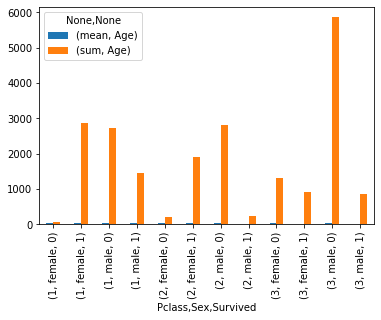

In [11]:
age_by_pc_sex_sur.plot(kind = 'bar')